In [1]:
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def get_dataframe(f_name, save_xlsx=False):
    with open(f"raw_data/{f_name}.bmerawdata") as f:
        j = json.load(f)
    column_names = [el["name"] for el in j["rawDataBody"]["dataColumns"]]
    df = pd.DataFrame(j["rawDataBody"]["dataBlock"], columns=column_names)

    if save_xlsx:
        df.to_excel(f"raw_data/{f_name}.xlsx")

    return df

In [7]:
df = get_dataframe("air", save_xlsx=False)

In [8]:
def build_sensor_data(df):
    df["Date"] = pd.to_datetime(
        df["Real time clock"],
        unit="s",
        utc=True).map(lambda x: x.tz_convert("Europe/Istanbul"))
    df["Date"] = df["Date"].dt.tz_localize(None)

    sensor_indexes = sorted(df["Sensor Index"].unique())

    sensors = {}
    for i in sensor_indexes:
        sensors[i] = {}
        sensor = df[df["Sensor Index"] == i]
        heater_indexes = sorted(sensor["Heater Profile Step Index"].unique())
        for j in heater_indexes:
            sensors[i][j] = sensor[sensor["Heater Profile Step Index"] == j]

    return sensors

In [10]:
def build_raw_data_pickle(save_pickle=False):
    sensor_data = {}
    for matrix in ["air", "oils"]:
        df = get_dataframe(matrix)
        sensor_data[f"{matrix}"] = build_sensor_data(df)

    if save_pickle:
        with open("raw_sensor_data.pkl", "wb") as f:
            pickle.dump(sensor_data, f)

    return sensor_data

In [11]:
sensor_data = build_raw_data_pickle(save_pickle=True)

In [12]:
sensor_data["air"][0][0]

,Sensor Index,Sensor ID,Time Since PowerOn,Real time clock,Temperature,Pressure,Relative Humidity,Resistance Gassensor,Heater Profile Step Index,Scanning Mode Enabled,Scanning Cycle Index,Label Tag,Error Code,Date
18,0,355892538,15871,1750836087,26.597507,922.913940,38.388920,1.593774e+06,0,1,1,0,0,2025-06-25 10:21:27
125,0,355892538,43285,1750836115,28.360437,922.897400,30.980013,1.024000e+08,0,1,1,0,0,2025-06-25 10:21:55
225,0,355892538,70673,1750836142,29.389664,922.881409,29.062103,1.024000e+08,0,1,1,0,0,2025-06-25 10:22:22
324,0,355892538,98090,1750836169,30.281168,922.857239,27.823591,1.024000e+08,0,1,1,0,0,2025-06-25 10:22:49
429,0,355892538,125490,1750836197,31.057486,922.846863,26.664312,1.024000e+08,0,1,1,0,0,2025-06-25 10:23:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84344,0,355892538,22933089,1750859007,38.435341,921.419128,18.438959,1.024000e+08,0,1,1,0,0,2025-06-25 16:43:27
84440,0,355892538,22960519,1750859035,38.470406,921.468628,18.435892,1.024000e+08,0,1,1,0,0,2025-06-25 16:43:55
84546,0,355892538,22987935,1750859062,38.475414,921.428040,18.410206,1.024000e+08,0,1,1,0,0,2025-06-25 16:44:22
84641,0,355892538,23015318,1750859090,38.472908,921.372253,18.410051,1.024000e+08,0,1,1,0,0,2025-06-25 16:44:50


In [13]:
def plot_sensor(matrix, sensor_idx, sensor_data):
    plt.figure(figsize=(8, 4))
    plt.title(f"Matrix {matrix}, Sensor {sensor_idx}")
    plt.yscale("log")
    for hp_idx, val in sensor_data[f"{matrix}"][sensor_idx].items():
        resistance = val["Resistance Gassensor"].values
        time_ms = val["Time Since PowerOn"].values
        plt.plot(time_ms, resistance, label=f"HP {hp_idx}")
    plt.legend()
    plt.show()

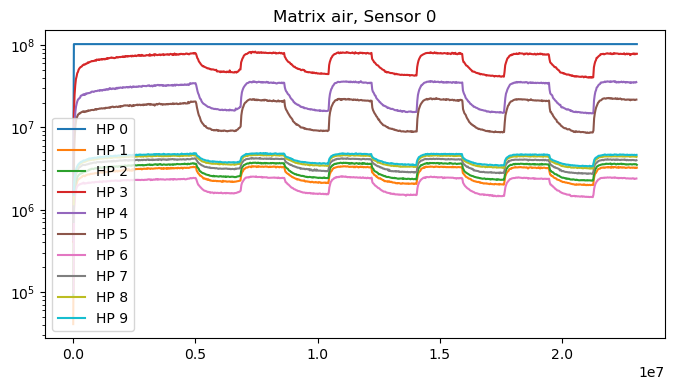

In [24]:
plot_sensor("air", 0, sensor_data)

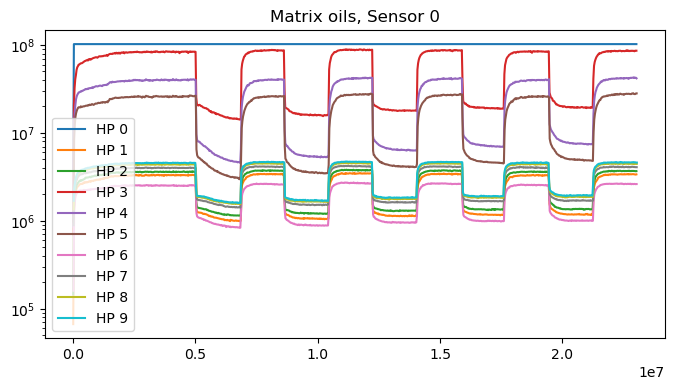

In [32]:
plot_sensor("oils", 0, sensor_data)